In [5]:
! pip install kagglehub --upgrade
import kagglehub

#download the latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")


c:\Users\magn4\OneDrive\Skole\8. Semester\Deeplearning\Miniproject-DeepLearning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import os

path = r'C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8'

file_count = sum(len(files) for _, _, files in os.walk(path))
print(f'{file_count} files')

# Get the main folders (train, test, val)
dir_set = next(os.walk(path))[1]
print(f'{dir_set}')

# Get class names from the train folder
class_names = next(os.walk(os.path.join(path, 'train')))[1]
class_count = len(class_names)
print(f'{class_count} classes')

class_images = []

# Count the number of samples for each class across train, test, and val
for class_name in class_names:
    count = 0
    for folder in dir_set:  # train, test, val
        path_temp = os.path.join(path, folder, class_name)  # Match class names inside each folder
        if os.path.exists(path_temp):
            count += len(os.listdir(path_temp))
    #print(f'{class_name}: {count} samples')
    class_images.append(count)

3825 files
['test', 'train', 'validation']
36 classes


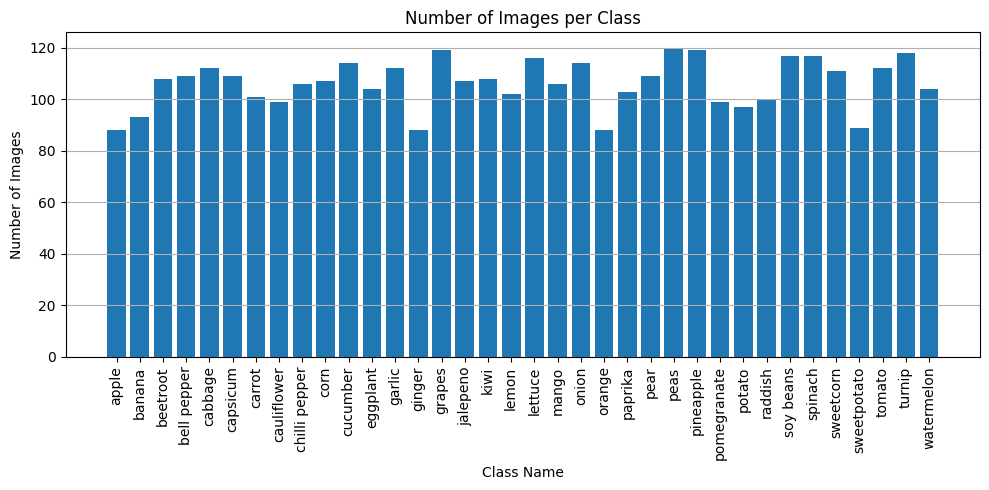

In [2]:
! pip install matplotlib --upgrade
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(class_names, class_images)
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

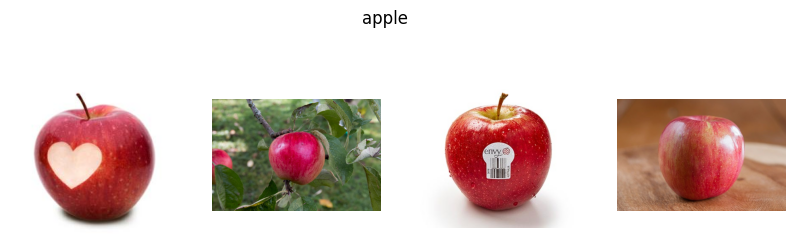

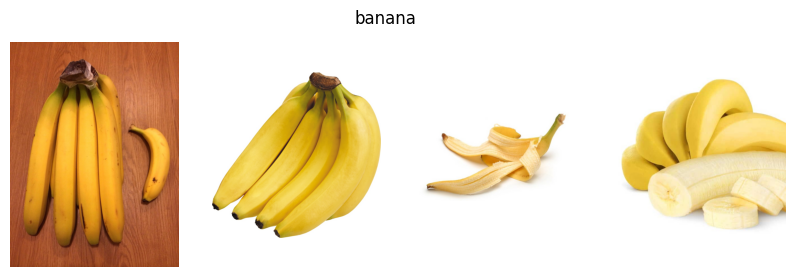

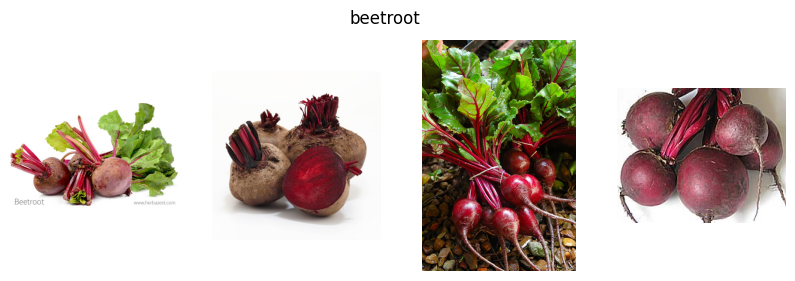

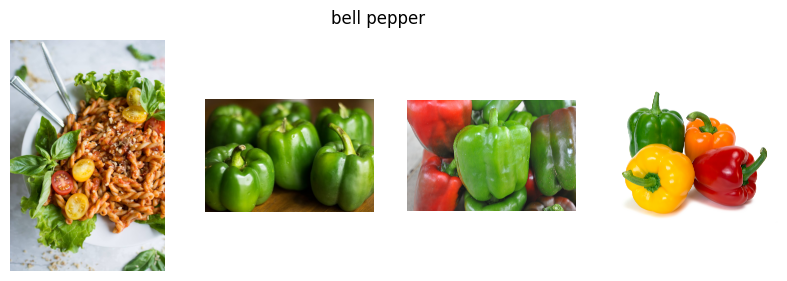

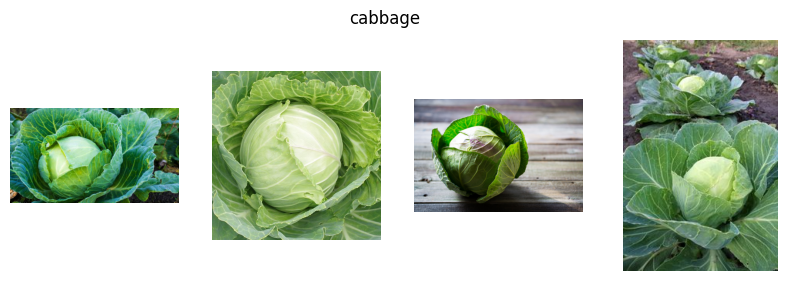

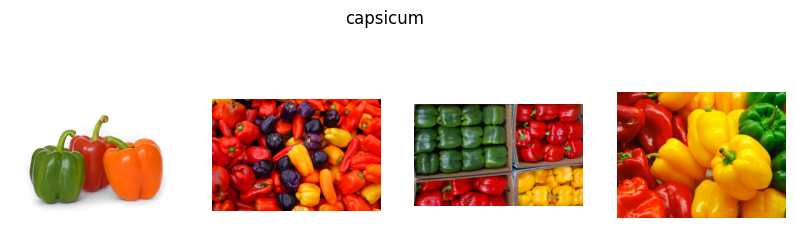

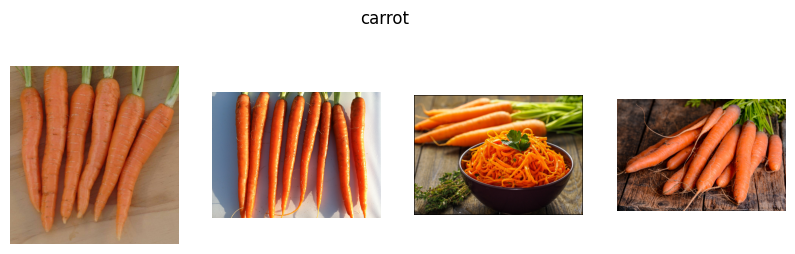

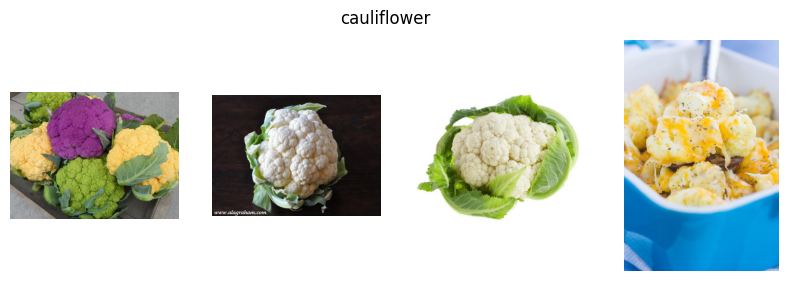

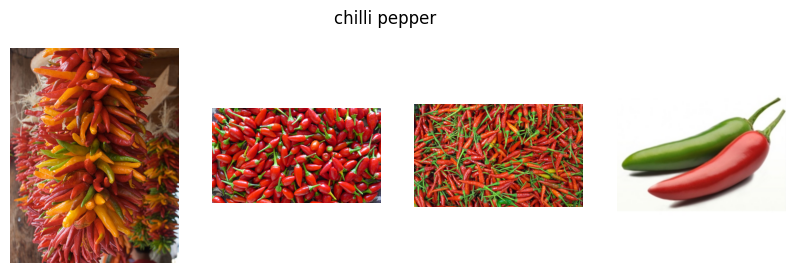

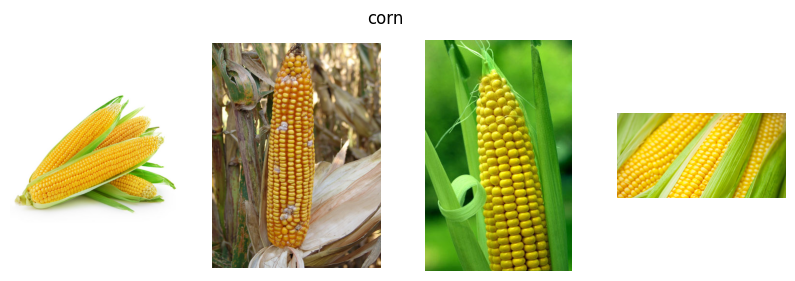

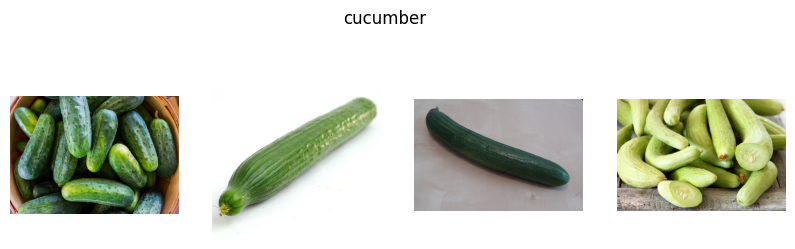

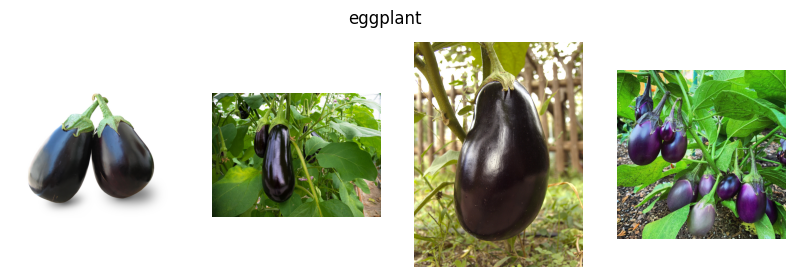

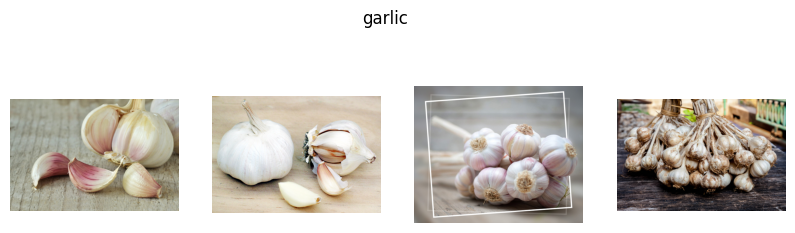

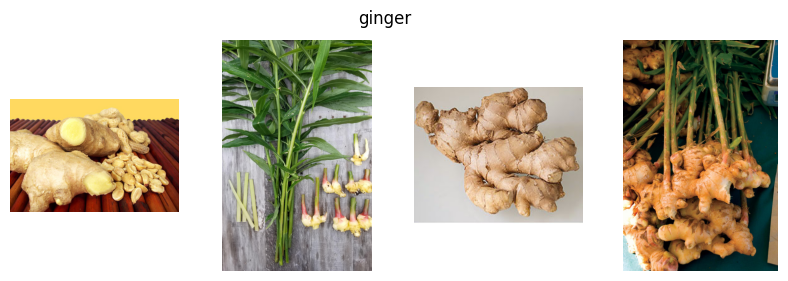

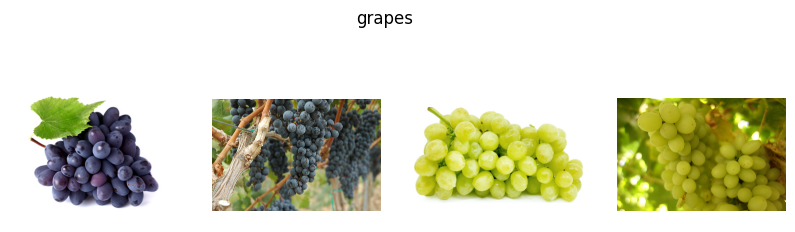

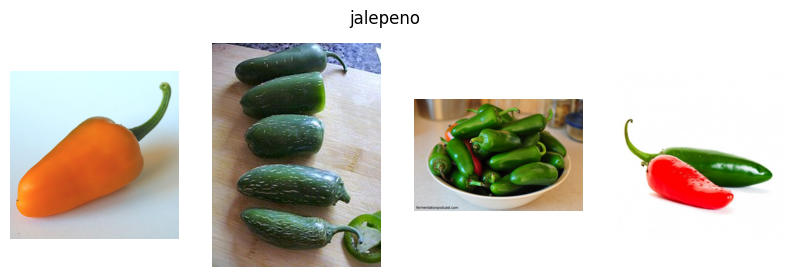

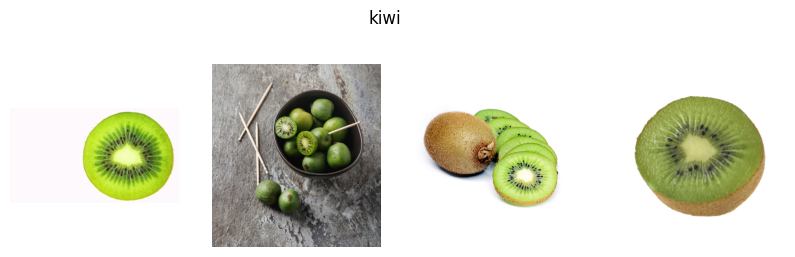

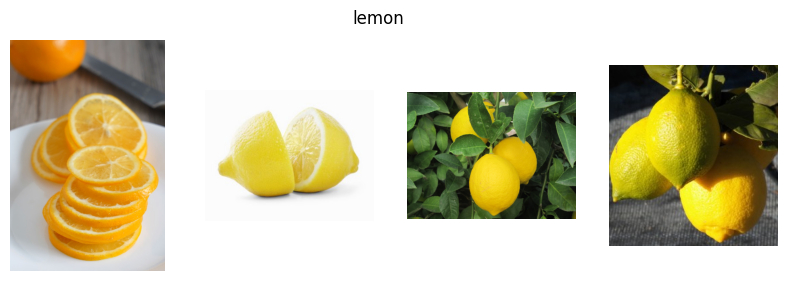

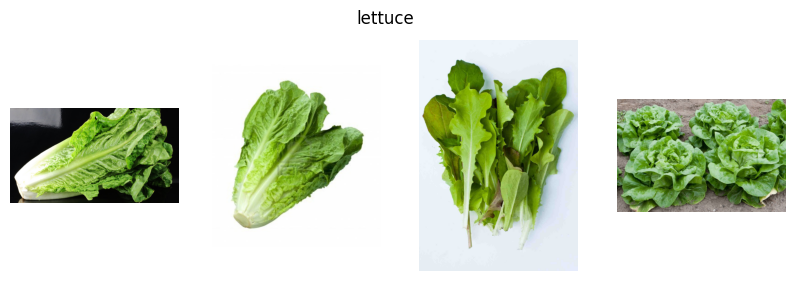

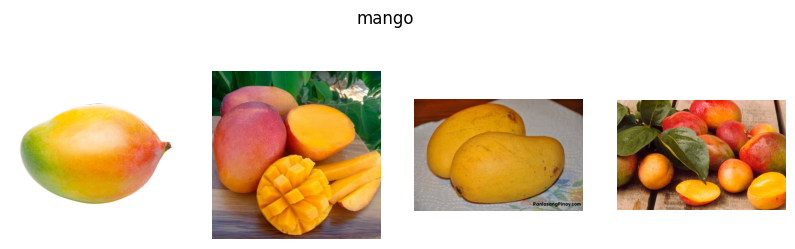

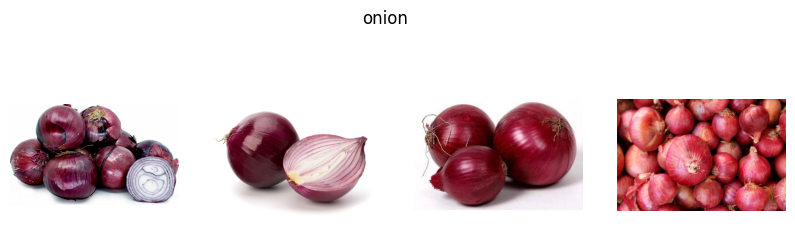

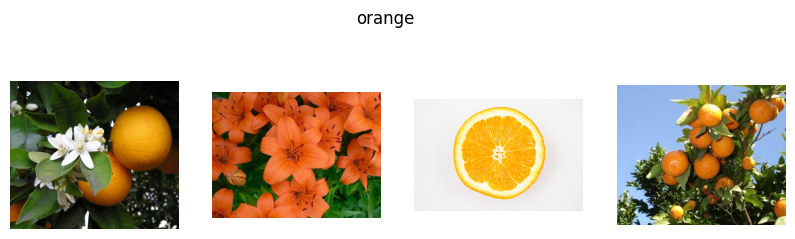

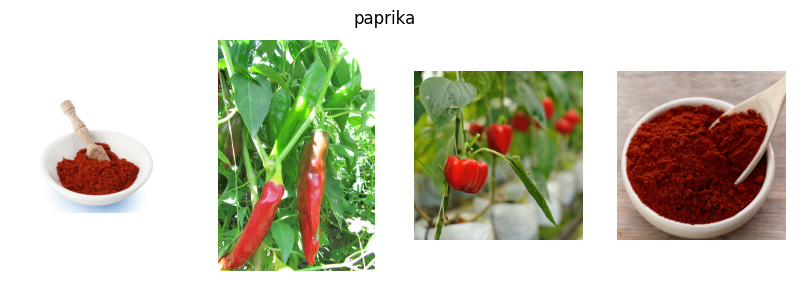

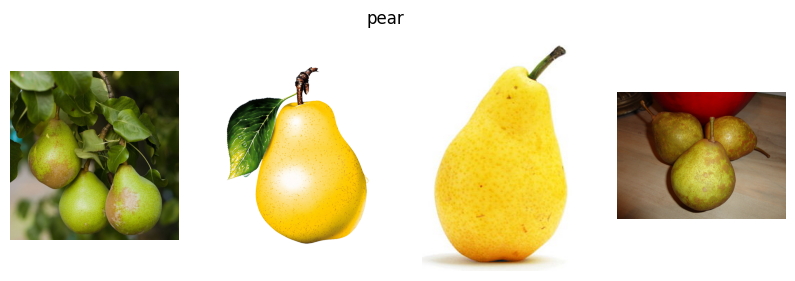

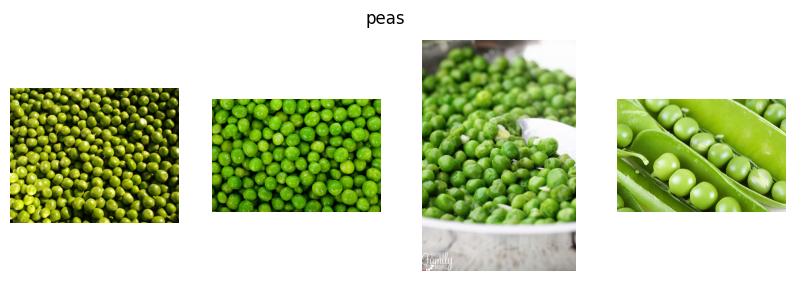

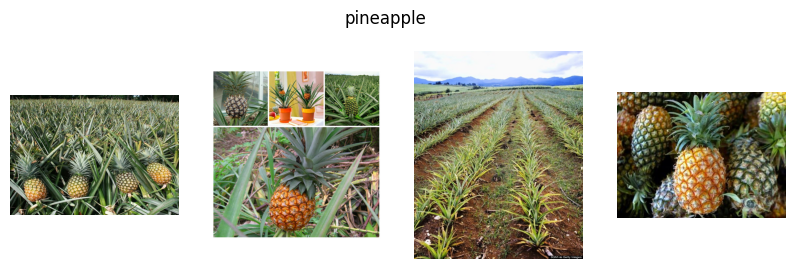

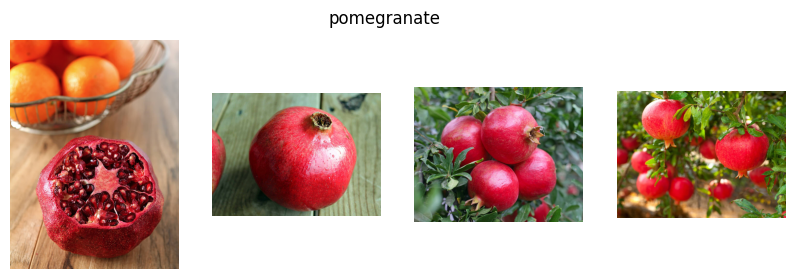

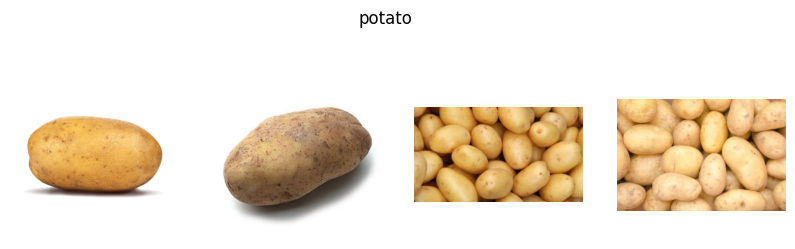

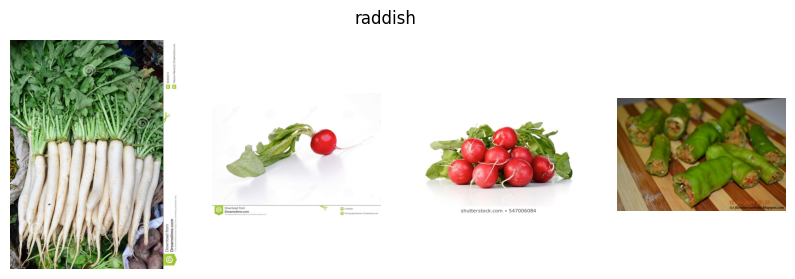

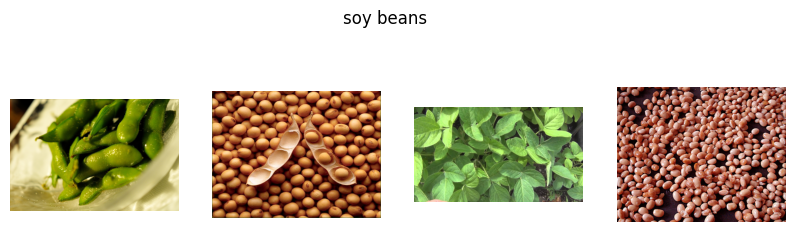

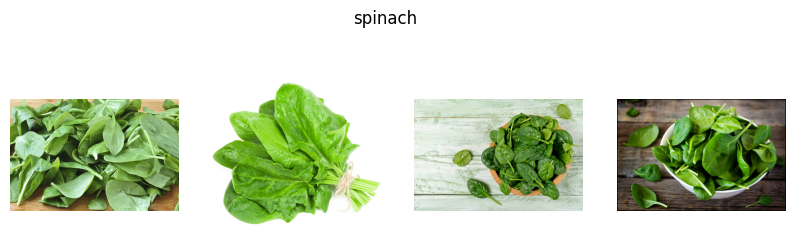

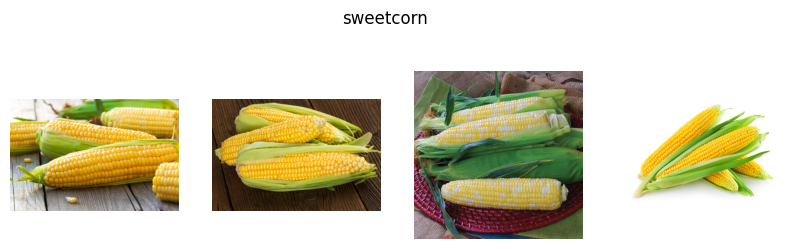

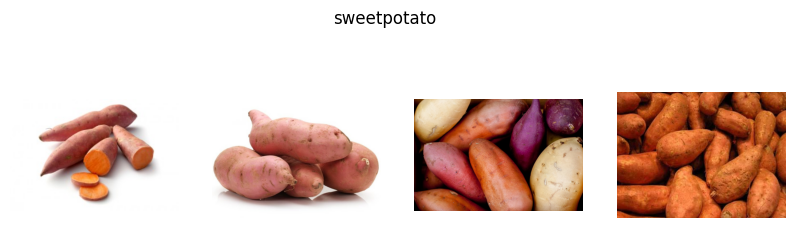

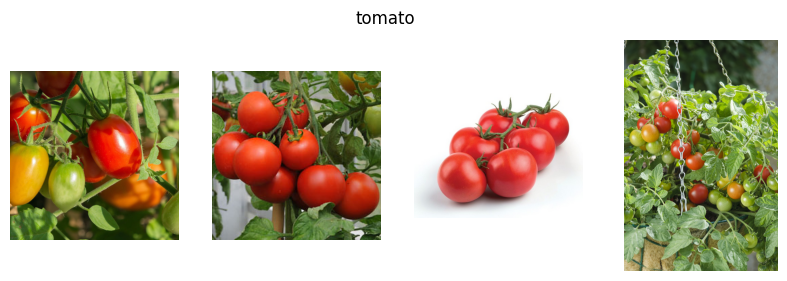

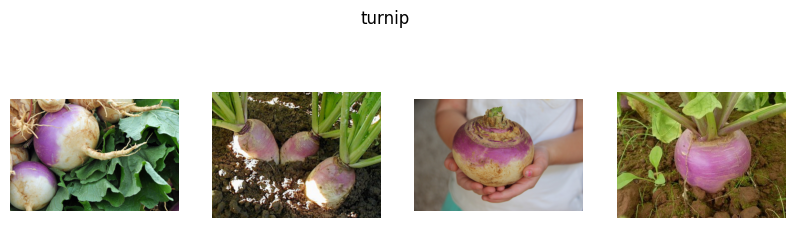

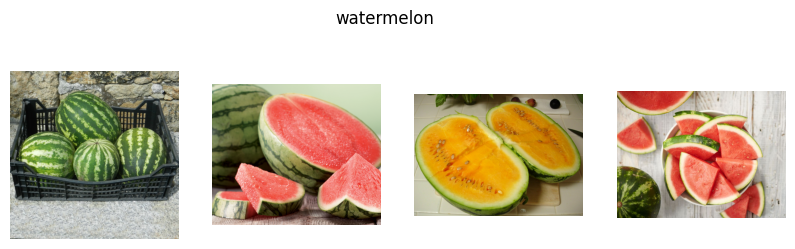

In [3]:
# show images
! pip install pillow --upgrade
from PIL import Image
import random

for root, subdirs, files in os.walk(path + '/train'):
    image_files = [os.path.join(root, file) for file in files if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
    
    if len(image_files) > 0:
        random_images = random.sample(image_files, min(4, len(image_files)))
        
        plt.close('all')  # Close previous figures to avoid overlapping axes
        plt.figure(figsize=(10, 3))
        
        for i, image_path in enumerate(random_images):
            img = Image.open(image_path)
            ax = plt.subplot(1, 4, i + 1)  # Create new subplot
            ax.imshow(img)
            ax.axis('off')

        # Use suptitle for the overall figure title
        plt.suptitle(os.path.basename(root))
        plt.show()

In [ ]:

from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.utils import array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = datagen.flow_from_directory(
    os.path.join(path, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

#load a sample image
img_path = os.path.join(path, 'train', 'apple', 'Image_1.jpg')

img = load_img(img_path, target_size=(150, 150))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='preview', 
                          save_prefix ='image', save_format ='jpeg'):
    i += 1
    if i > 5:
        break

Found 3115 images belonging to 36 classes.


FileNotFoundError: [Errno 2] No such file or directory: 'preview\\image_0_4898.jpeg'

In [ ]:
! pip install Augmentor
import Augmentor

p = Augmentor.Pipeline()


_, class_folders, _ = next(os.walk(os.path.join(path, 'train')))

for folder in class_folders:
    for image in folder:
        




C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\apple
C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\banana
C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\beetroot
C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\bell pepper
C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\cabbage
C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\capsicum
C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\carrot
C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8\train\cauliflower
C:\Users\magn4\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-im